In [2]:
# standard libraries
import pandas as pd
import numpy as np

import os
from os import listdir
from os.path import isfile, join

from IPython.display import Image
#from IPython.display import clear_output
#import sklearn
import time
#import re

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from tabulate import tabulate

# data pre-processing
'''from sklearn.impute._base import _BaseImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection._split import BaseShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
'''
# prediction models
'''from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score'''

# import warnings filter
'''import warnings
warnings.filterwarnings('ignore')
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)'''

"import warnings\nwarnings.filterwarnings('ignore')\nfrom warnings import simplefilter \nsimplefilter(action='ignore', category=FutureWarning)"

In [3]:
class FilePathManager:
    def __init__(self, local_dir: str):
        self.local_dir = local_dir
    
    def retrieve_full_path(self):
        return os.getcwd()+'/'+self.local_dir

In [4]:
class Loader:
    df = pd.DataFrame()
    
    def load_data(self, file_name):
        pass
    
    def get_df(self):
        pass
    
    def size(self):
        return len(self.df)

In [5]:
from typing import Callable
 
class CSVLoader(Loader):
    def __init__(self, file_path_manager: FilePathManager):
        self.file_path_manager = file_path_manager
        
    def load_data(self, _prepare_data: Callable[[pd.DataFrame], pd.DataFrame] = None):
        self.df = pd.read_csv(self.file_path_manager.retrieve_full_path())
        if _prepare_data:
            self.df = _prepare_data(self.df)
    
    def get_df(self):
        return self.df;
    
    def size(self):
        return len(self.df)  

In [ ]:
def clean_data(df):
    df['y'] = df['y'].astype(int)
    return df

In [108]:
loader = CSVLoader(FilePathManager('final_project(5).csv'))
loader.load_data() #clean_data
df = loader.get_df()

## EDA

In [14]:
df.shape

(160000, 51)

In [7]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [73]:
def target_EDA(target):
    y_barchart = sns.countplot(x = target)
    y_counts = target.value_counts()
    y_pcts = target.value_counts(normalize=True)   
    
    return plt.show(), print("Counts:\n", y_counts), print("\nPercents:\n", y_pcts) 

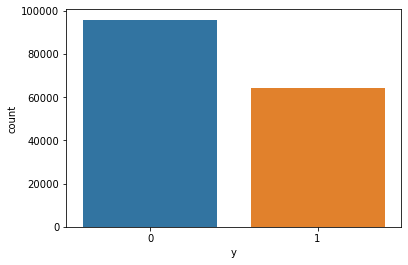

Counts:
 0    95803
1    64197
Name: y, dtype: int64

Percents:
 0    0.598769
1    0.401231
Name: y, dtype: float64


(None, None, None)

In [74]:
target_EDA(df['y'])

### Missing Values & Data Types
- Minimal missing values, <= 0.03% of feature data.  No missing values for target response.
- Five features were read in as object (string) data types, the rest are float64 (continuous)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [16]:
pct_missing = ( df.shape[0] - df.describe().T['count'] )/df.shape[0]*100
pct_missing.sort_values(ascending=False)

x23    0.029375
x10    0.026875
x34    0.025625
x33    0.025625
x44    0.025000
x18    0.025000
x41    0.025000
x31    0.024375
x2     0.023750
x20    0.023750
x47    0.023125
x5     0.023125
x43    0.023125
x3     0.023125
x40    0.022500
x12    0.022500
x26    0.022500
x15    0.021875
x28    0.021875
x19    0.021875
x14    0.021250
x49    0.020000
x48    0.020000
x46    0.019375
x13    0.019375
x38    0.019375
x27    0.018750
x35    0.018750
x11    0.018750
x9     0.018750
x45    0.018125
x21    0.018125
x22    0.016875
x7     0.016875
x17    0.016875
x36    0.016875
x42    0.016250
x0     0.016250
x16    0.016250
x6     0.016250
x4     0.016250
x1     0.015625
x39    0.014375
x25    0.013750
x8     0.013125
y      0.000000
Name: count, dtype: float64

#### Continuous features need to be centered and scaled

In [17]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


#### Only three features are truly object (string) data types: x24, x29, x30.  

In [109]:
cont_vars = df.describe().columns
cat_vars = set(df.columns) - set(cont_vars)
df[cat_vars].describe()

,x24,x32,x37,x29,x30
count,159972,159969,159977,159970,159970
unique,3,12,129198,12,5
top,asia,0.01%,$-311.26,July,wednesday
freq,138965,40767,6,45569,101535


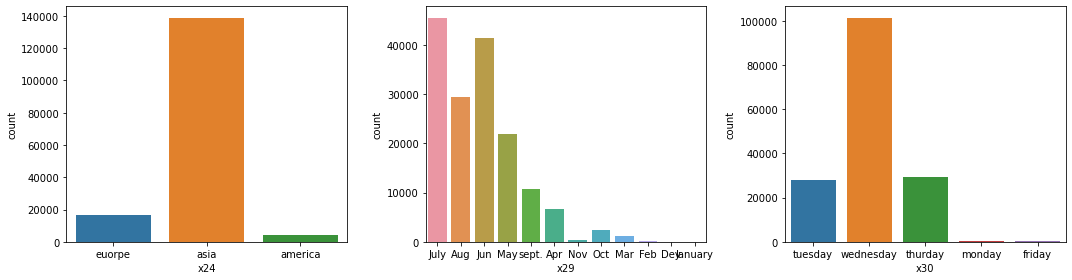

In [102]:
fig, axis = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot(ax=axis[0], x = df['x24'])
sns.countplot(ax=axis[1], x = df['x29'])
sns.countplot(ax=axis[2], x = df['x30'])
fig.tight_layout() 

#### Features x32 and x37 need to be recoded as float

In [110]:
df['x32'] = df['x32'].str.replace('%','').astype(float)
df['x37'] = df['x37'].str.replace('$','').astype(float)

C:\Users\allep\anaconda3\envs\MyEnv3_7\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [111]:
df.loc[:,['x32','x37']].describe()

,x32,x37
count,159969.000000,159977.000000
mean,-0.000011,0.377628
std,0.010400,999.945334
min,-0.050000,-4734.540000
25%,-0.010000,-691.370000
50%,0.000000,-13.760000
75%,0.010000,664.210000
max,0.050000,5546.990000


In [112]:
cont_vars = list(cont_vars)
cont_vars.pop() # remove 'y'
cont_vars.append('x32')
cont_vars.append('x37')
np.array(cont_vars)

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31',
       'x33', 'x34', 'x35', 'x36', 'x38', 'x39', 'x40', 'x41', 'x42',
       'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x32', 'x37'],
      dtype='<U3')

In [113]:
len(cont_vars)

47

### Skewness & Outliers
Features are not skewed and no major outliers are present.  Scale the data and proceed.

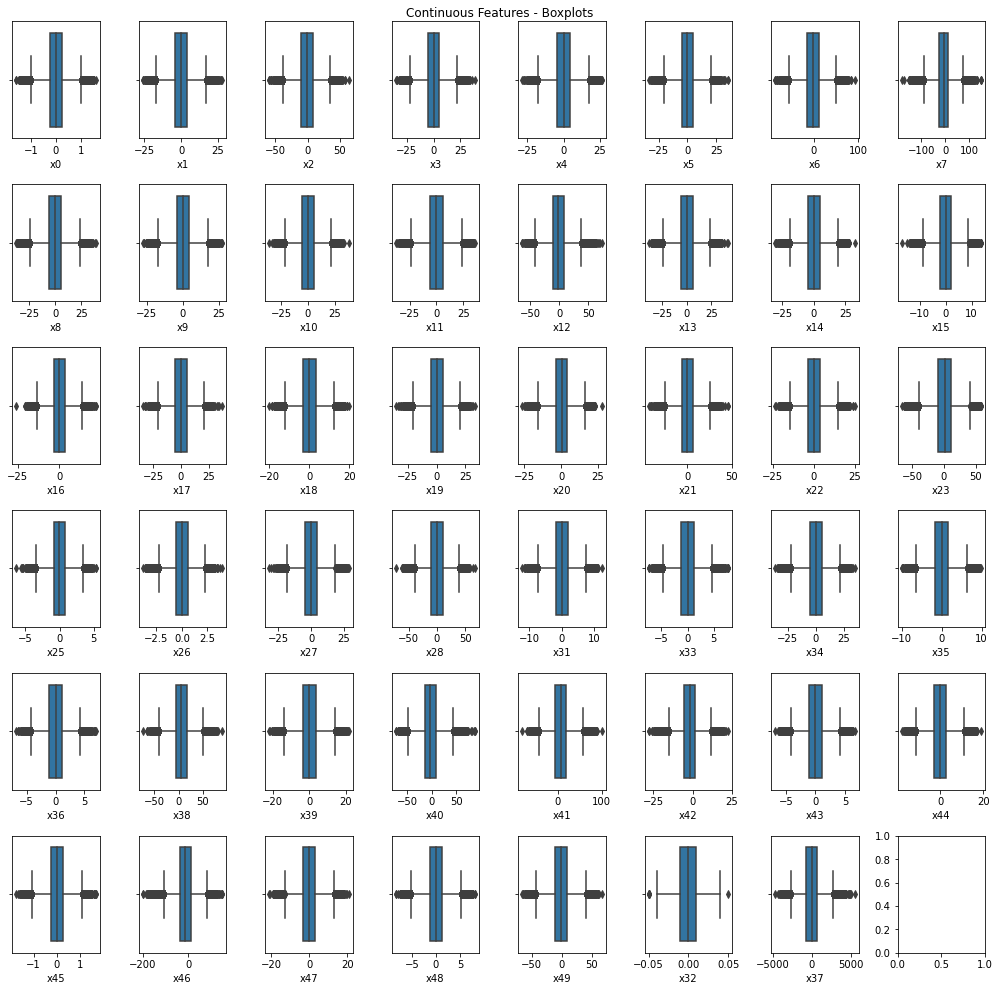

In [116]:
fig, axes = plt.subplots(6, 8, figsize=(14, 14))
fig.suptitle('Continuous Features - Boxplots')
for i,j in zip(cont_vars, range(47)):
    sns.boxplot(ax = axes[int(j/8), j%8], x = df[i])

fig.tight_layout()